In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GOOGL.csv to GOOGL.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['GOOGL.csv']), index_col='Date', parse_dates=True)
df = df.dropna()
print('Shape of data', df.shape)
df

Shape of data (4114, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055
...,...,...,...,...,...,...
2020-12-14,1789.800049,1749.130005,1770.719971,1752.260010,1652500.0,1752.260010
2020-12-15,1764.000000,1741.670044,1759.859985,1761.079956,1068300.0,1761.079956
2020-12-16,1769.109985,1749.060059,1769.109985,1757.189941,1233800.0,1757.189941


In [ ]:
dates = df['Date'][:int(len(df)*.85)]
dates 

0       2004-08-19
1       2004-08-20
2       2004-08-23
3       2004-08-24
4       2004-08-25
           ...    
3491    2018-07-02
3492    2018-07-03
3493    2018-07-05
3494    2018-07-06
3495    2018-07-09
Name: Date, Length: 3496, dtype: object

In [ ]:
df1=df.reset_index()['Close']
# df1 = df['Close']
df1

0         50.220219
1         54.209209
2         54.754753
3         52.487488
4         53.053055
           ...     
4109    1752.260010
4110    1761.079956
4111    1757.189941
4112    1740.510010
4113    1726.219971
Name: Close, Length: 4114, dtype: float64

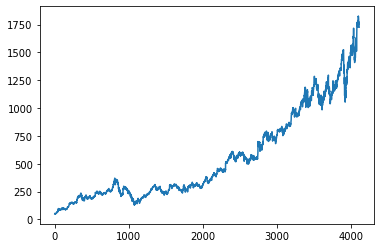

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
# df['Close'].plot(figsize=(12,5))

In [ ]:
import numpy as np 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[9.30551352e-05],
       [2.34048161e-03],
       [2.64784489e-03],
       ...,
       [9.61812238e-01],
       [9.52414642e-01],
       [9.44363530e-01]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
# test_size=len(df1)-training_size
test_size=int(len(df1)*.1)
dataset_length = training_size+test_size
train_data,test_data=df1[0:training_size],df1[training_size:dataset_length]

In [ ]:
training_size, test_size

(3085, 411)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----149   150 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3...t+149 and Y=t+150
time_step = 150
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train.shape), print(y_train.shape)

(2934, 150)
(2934,)


(None, None)

In [ ]:
print(x_test.shape), print(y_test.shape)

(260, 150)
(260,)


(None, None)

In [ ]:
import tensorflow as tf

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 150, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
46/46 [==============================] - 18s 278ms/step - loss: 0.0030 - val_loss: 5.0268e-04
Epoch 2/100
46/46 [==============================] - 11s 246ms/step - loss: 1.2124e-04 - val_loss: 5.4425e-04
Epoch 3/100
46/46 [==============================] - 12s 250ms/step - loss: 1.1235e-04 - val_loss: 5.5825e-04
Epoch 4/100
46/46 [==============================] - 11s 249ms/step - loss: 1.0970e-04 - val_loss: 6.3440e-04
Epoch 5/100
46/46 [==============================] - 11s 250ms/step - loss: 1.0853e-04 - val_loss: 4.7281e-04
Epoch 6/100
46/46 [==============================] - 11s 250ms/step - loss: 1.0326e-04 - val_loss: 4.5900e-04
Epoch 7/100
46/46 [==============================] - 11s 249ms/step - loss: 1.0204e-04 - val_loss: 6.2670e-04
Epoch 8/100
46/46 [==============================] - 12s 251ms/step - loss: 9.9759e-05 - val_loss: 5.0799e-04
Epoch 9/100
46/46 [==============================] - 12s 251ms/step - loss: 1.0668e-04 - val_loss: 5.3457e-04
Epoch 10/100
4

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

401.3826632289421

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1030.6951913035693

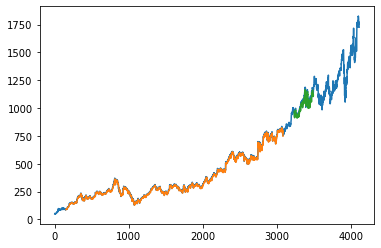

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testPredictPlot[len(train_predict)+(look_back*2)+1:dataset_length-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[len(test_data)-150:].reshape(1,-1)
x_input.shape

(1, 150)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

nod=60
lst_output=[]
n_steps=150
i=0
while(i<nod):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.6195020079612732], [0.6105606555938721], [0.5976749062538147], [0.5862225294113159], [0.5773483514785767], [0.5708429217338562], [0.5660563707351685], [0.5622290372848511], [0.5586962103843689], [0.555002748966217], [0.5509299635887146], [0.5464586615562439], [0.5416991114616394], [0.5368171334266663], [0.5319746732711792], [0.5272924900054932], [0.5228376984596252], [0.5186275243759155], [0.5146439075469971], [0.510850191116333], [0.5072048902511597], [0.503672182559967], [0.5002260804176331], [0.4968510866165161], [0.49354061484336853], [0.49029341340065], [0.48711082339286804], [0.4839940369129181], [0.4809434115886688], [0.4779568314552307], [0.47503089904785156], [0.47216081619262695], [0.4693414270877838], [0.46656760573387146], [0.4638349115848541], [0.4611393213272095], [0.4584779739379883], [0.45584821701049805], [0.45324814319610596], [0.4506765604019165], [0.4481320381164551], [0.44561347365379333], [0.4431198537349701], [0.4406503140926361], [0.4382038712501526], [0.435

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,151+nod)

In [ ]:
# len(scaler.inverse_transform(df1[4014:]).flatten())
len(day_pred)

60

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# scaler.inverse_transform(lst_output)
dataset_length

3496

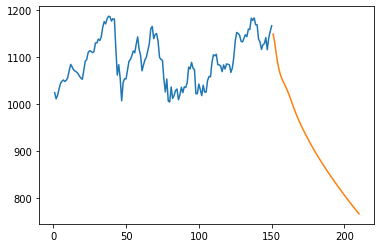

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[dataset_length-150:dataset_length]).flatten())
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1[:dataset_length].tolist()
df3.extend(lst_output)
# plt.plot(df3[500:])
df3=scaler.inverse_transform(df3).tolist()
df4=df1[:dataset_length+100]
df4=scaler.inverse_transform(df4)

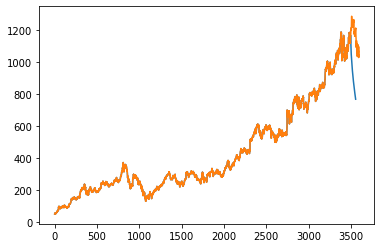

In [ ]:
plt.plot(df3)
plt.plot(df4) # actual - orange

In [ ]:
# df4=scaler.inverse_transform(lst_output)
# df4[-1]